# 1. Loading the data

## 1.1 Loading the nouns

In [1]:
text_file = open("2000_nouns_sorted.txt", "r")

lines = text_file.read().split('\n')
 

    

print(lines[0], len(lines), len(lines[0]))
#print(lines)

dollar 2000 6


## 1.2 Loading the embeddings

In [2]:
def read_and_make_dict(filename):
    emb_file = open(filename, "r")
    emb = emb_file.read().split('\n')
    emb_file.close()
    emb_split = [word.split(' ') for word in emb]
    emb_dict = {word[0]:word[1:] for word in emb_split}
    
    return emb_dict

Dependency Based Model

In [ ]:
dep_words_dict = read_and_make_dict('deps.words')

In [ ]:
dep_context_dict =read_and_make_dict('deps.contexts')

Bag-of-words k=2

In [3]:
bow2_words_dict = read_and_make_dict('bow2.words')

In [4]:
bow2_contexts_dict = read_and_make_dict('bow2.contexts')

In [9]:
len(bow2_contexts_dict.keys())

183871

Bag-of-words k=5

In [ ]:
bow5_words_dict = read_and_make_dict('bow5.words') 

In [ ]:
bow5_contexts_dict = read_and_make_dict('bow5.contexts')

# 2. Word Similarity Task

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr, spearmanr

In [5]:
def get_pearson_spearman(filename):
    # get dictionary of word:vector
    words_dict = {}
    with open(filename, "r") as f:
        for line in f:
            word = line.split()
            words_dict[word[0]] = word[1:] 
    # get similarities of every word pair in simlex
    simlex = []
    model_simlex = []
    with open("SimLex-999.txt", "r") as f:
        next(f)
        for line in f:
            line_list = line.split()
            word1 = line_list[0]
            word2 = line_list[1]
            if word1 in words_dict and  word2 in words_dict:
                simlex.append(float(line_list[3]))
                sim = cosine_similarity([words_dict[word1]], [words_dict[word2]])
                model_simlex.append(float(sim))
    # calculate pearson and spearman with simlex
    pearson_simlex = pearsonr(model_simlex, simlex)
    spearman_simlex = spearmanr(model_simlex, simlex)
    
    # get similarities of wordpairs in MEN
    MEN = []
    model_MEN = []
    with open("MEN_dataset_natural_form_full", "r") as f:
        for line in f:
            line_list = line.split()
            word1 = line_list[0]
            word2 = line_list[1]
            if word1 in words_dict and  word2 in words_dict:
                MEN.append(float(line_list[2]))
                sim = cosine_similarity([words_dict[word1]], [words_dict[word2]])
                model_MEN.append(float(sim))
    # calculate pearson and spearman with MEN
    pearson_MEN = pearsonr(model_MEN, MEN)
    spearman_MEN = spearmanr(model_MEN, MEN)
    return[pearson_simlex, spearman_simlex, pearson_MEN, spearman_MEN]

In [6]:
[p_lex, s_lex, p_men, s_men] = get_pearson_spearman("bow2.words")
print('simlex correlations')
print(p_lex)
print(s_lex)
print('MEN correlations')
print(p_men)
print(s_men)

simlex correlations
(0.4284586618164498, 7.992996652236848e-46)
SpearmanrResult(correlation=0.41414576777339385, pvalue=1.226812869252797e-42)
MEN correlations
(0.6776982244699229, 0.0)
SpearmanrResult(correlation=0.699904755830819, pvalue=0.0)


In [7]:
[p_lex, s_lex, p_men, s_men] = get_pearson_spearman("bow5.words")
print('simlex correlations')
print(p_lex)
print(s_lex)
print('MEN correlations')
print(p_men)
print(s_men)

simlex correlations
(0.37560059706687154, 8.607410572298394e-35)
SpearmanrResult(correlation=0.36739613669787896, pvalue=2.9775781067162087e-33)
MEN correlations
(0.708236248047157, 0.0)
SpearmanrResult(correlation=0.7231686561368845, pvalue=0.0)


In [8]:
[p_lex, s_lex, p_men, s_men] = get_pearson_spearman("deps.words")
print('simlex correlations')
print(p_lex)
print(s_lex)
print('MEN correlations')
print(p_men)
print(s_men)

simlex correlations
(0.4619013442972357, 6.838935662413988e-54)
SpearmanrResult(correlation=0.44564093493303847, pvalue=7.414295711467646e-50)
MEN correlations
(0.5974016044666723, 1.0183783114142845e-289)
SpearmanrResult(correlation=0.6178227900207052, pvalue=2.37026036e-315)


# 3. Word Analogy Task

# 4. Clustering Word Vectors

In [1]:
import string
from itertools import compress

def filter_cluster_embeddings(model_file):

    #Load 2000 nouns
    with open("2000_nouns_sorted.txt", "r") as f:
        nouns = f.read().splitlines()

    nouns = [noun.strip() for noun in nouns]
    
    #Filter punctuation from noun words   
    new_nouns = []
    for noun in nouns:
        for c in string.punctuation:
            noun=noun.replace(c,"")
        new_nouns.append(noun)
    nouns = new_nouns

    #Load trained embeddings
    words_dict = {}
    with open(model_file, "r") as f:
        for line in f:
            word = line.split()
            words_dict[word[0]] = word[1:] 
            
    #Filter 2000 words
    words_dict_2000 = { noun: words_dict[noun] for noun in nouns}
    
    #Get values by sorted keys    
    words = sorted(words_dict_2000.keys())
    embeddings = [words_dict_2000[key] for key in sorted(words_dict_2000.keys())]
    
    return words, embeddings

In [42]:
words_bow2, embeddings_bow2 = filter_cluster_embeddings("bow2.words")

In [43]:
words_bow5, embeddings_bow5 = filter_cluster_embeddings("bow5.words")

In [44]:
words_deps, embeddings_deps = filter_cluster_embeddings("deps.words")

### Visualization

In [112]:
#PCA
from sklearn.decomposition import PCA
import seaborn as sb
import matplotlib.pyplot as plt

def pca_visualization(num_components, embeddings):
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(embeddings)
    print 'Variation per principal component: {}'.format(pca.explained_variance_ratio_)
    return pca_result

Variation per principal component: [0.03162729 0.02683354]
Variation per principal component: [0.0402623  0.03309647]
Variation per principal component: [0.03549473 0.03201278]


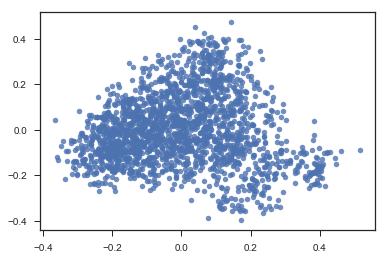

In [146]:
pca_bow2 = pca_visualization(2,embeddings_bow2)
pca_bow5 = pca_visualization(2,embeddings_bow5)
pca_deps = pca_visualization(2,embeddings_deps)

#sb.regplot(x=pca_bow2[:,0], y=pca_bow2[:,1], fit_reg=False)
#sb.regplot(x=pca_bow5[:,0], y=pca_bow5[:,1], fit_reg=False)
sb.regplot(x=pca_deps[:,0], y=pca_deps[:,1], fit_reg=False, scatter_kws={"s": 30})

In [135]:
#t-SNE
import time
from sklearn.manifold import TSNE

def tsne_visualization(embeddings, p, num_iter):
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=num_iter)
    tsne_results = tsne.fit_transform(embeddings)
    return tsne_results

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1996 samples in 0.021s...
[t-SNE] Computed neighbors for 1996 samples in 3.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1996
[t-SNE] Computed conditional probabilities for sample 1996 / 1996
[t-SNE] Mean sigma: 0.268582
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.638733
[t-SNE] Error after 2000 iterations: 1.896763


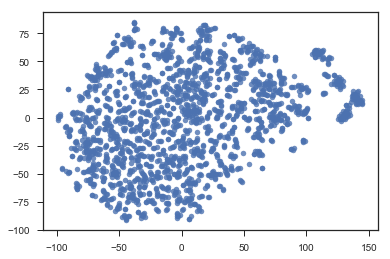

In [147]:
tsne_bow2 = tsne_visualization(embeddings_bow2, 10, 2000)
sb.regplot(x=tsne_bow2[:,0], y=tsne_bow2[:,1], fit_reg=False, scatter_kws={"s": 30})

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1996 samples in 0.023s...
[t-SNE] Computed neighbors for 1996 samples in 3.156s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1996
[t-SNE] Computed conditional probabilities for sample 1996 / 1996
[t-SNE] Mean sigma: 0.291273
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.326591
[t-SNE] Error after 2000 iterations: 1.785953


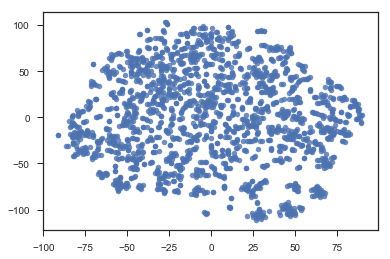

In [148]:
tsne_bow5 = tsne_visualization(embeddings_bow5, 10, 2000)
sb.regplot(x=tsne_bow5[:,0], y=tsne_bow5[:,1], fit_reg=False, scatter_kws={"s": 30})

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1996 samples in 0.036s...
[t-SNE] Computed neighbors for 1996 samples in 3.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1996
[t-SNE] Computed conditional probabilities for sample 1996 / 1996
[t-SNE] Mean sigma: 0.264414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.090813
[t-SNE] Error after 2000 iterations: 1.690811


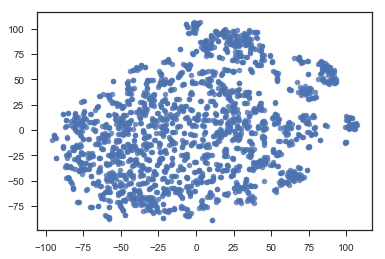

In [149]:
tsne_deps = tsne_visualization(embeddings_deps, 10, 2000)
sb.regplot(x=tsne_deps[:,0], y=tsne_deps[:,1], fit_reg=False, scatter_kws={"s": 30})

### KMeans

In [45]:
from sklearn.cluster import KMeans


def kmeans_clustering(words, embeddings, num_clusters):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans_fit = kmeans_model.fit(embeddings)
    kmeans_labels = kmeans_fit.labels_
    for i in range(num_clusters):
        print('Cluster %s: %s' % (i, list(compress(words, kmeans_labels==i))))

In [46]:
kmeans_clustering(words_bow2, embeddings_bow2, 20)

Cluster 0: ['acre', 'apartment', 'area', 'barrier', 'bath', 'beach', 'bedroom', 'bell', 'block', 'border', 'boundary', 'breeze', 'brick', 'bridge', 'building', 'camp', 'canal', 'castle', 'cathedral', 'chamber', 'chapel', 'church', 'circle', 'city', 'cliff', 'complex', 'corner', 'corridor', 'cottage', 'countryside', 'county', 'cross', 'district', 'doorway', 'downstairs', 'east', 'entrance', 'estate', 'factory', 'farm', 'floor', 'forest', 'gallery', 'garage', 'garden', 'gate', 'grave', 'ground', 'grounds', 'hall', 'hill', 'home', 'horizon', 'hospital', 'hotel', 'house', 'interior', 'island', 'kitchen', 'lake', 'landscape', 'lane', 'line', 'location', 'middle', 'mile', 'mill', 'mine', 'mountain', 'nest', 'north', 'ocean', 'palace', 'park', 'passage', 'pond', 'pool', 'port', 'prison', 'prospect', 'quarter', 'railway', 'restaurant', 'ridge', 'river', 'road', 'room', 'route', 'seat', 'section', 'settlement', 'shelf', 'shelter', 'shop', 'shore', 'side', 'site', 'slope', 'south', 'square', 'st

In [47]:
kmeans_clustering(words_bow5, embeddings_bow5, 20)

Cluster 0: ['agency', 'airline', 'association', 'authority', 'bank', 'board', 'branch', 'brand', 'business', 'capital', 'chain', 'chamber', 'chapter', 'charity', 'clinic', 'commission', 'committee', 'community', 'company', 'corp', 'corporation', 'council', 'department', 'division', 'entity', 'facility', 'factory', 'family', 'firm', 'foundation', 'group', 'headquarters', 'holding', 'hospital', 'industry', 'institute', 'institution', 'joint', 'journal', 'label', 'library', 'major', 'manufacturer', 'media', 'ministry', 'museum', 'network', 'newspaper', 'office', 'operation', 'operator', 'organisation', 'organization', 'parent', 'partnership', 'plant', 'press', 'public', 'sector', 'shareholder', 'society', 'stake', 'store', 'subsidiary', 'supplier', 'telephone', 'trust', 'unit', 'university', 'venture', 'workshop']
Cluster 1: ['access', 'accommodation', 'acquisition', 'administration', 'advance', 'advice', 'allocation', 'analysis', 'application', 'architecture', 'assessment', 'assistance',

In [48]:
kmeans_clustering(words_deps, embeddings_deps, 20)

Cluster 0: ['administration', 'agency', 'airline', 'alliance', 'army', 'assembly', 'association', 'authority', 'award', 'bank', 'board', 'branch', 'cabinet', 'campaign', 'ceremony', 'chamber', 'championship', 'chapter', 'charity', 'circuit', 'clinic', 'club', 'coalition', 'college', 'commission', 'committee', 'community', 'company', 'competition', 'concert', 'conference', 'congress', 'convention', 'corp', 'corporation', 'council', 'court', 'crew', 'delegation', 'department', 'division', 'embassy', 'enterprise', 'event', 'exhibition', 'expedition', 'faction', 'family', 'festival', 'firm', 'fleet', 'foundation', 'fund', 'gang', 'government', 'group', 'industry', 'initiative', 'institute', 'institution', 'jury', 'laboratory', 'league', 'medal', 'meeting', 'ministry', 'mission', 'movement', 'network', 'office', 'organisation', 'organization', 'panel', 'parliament', 'partnership', 'party', 'police', 'prize', 'program', 'programme', 'project', 'regime', 'school', 'sector', 'service', 'sessio

### Agglomerative Clustering

In [49]:
from sklearn.cluster import AgglomerativeClustering


def agglomerative_clustering(words, embeddings, num_clusters):
    agglomerative_model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    agglomerative_fit = agglomerative_model.fit(embeddings)
    agglomerative_labels = agglomerative_fit.labels_
    for i in range(num_clusters):
        print('Cluster %s: %s' % (i, list(compress(words, agglomerative_labels==i))))

In [50]:
agglomerative_clustering(words_bow2, embeddings_bow2, 20)

Cluster 0: ['advertisement', 'advertising', 'allowance', 'applicant', 'asset', 'bank', 'budget', 'burden', 'business', 'buyer', 'cable', 'cash', 'channel', 'cheque', 'client', 'coin', 'collector', 'company', 'compensation', 'consumer', 'consumption', 'corp', 'corporation', 'cost', 'credit', 'creditor', 'currency', 'customer', 'dealer', 'debt', 'defendant', 'demand', 'dividend', 'dollar', 'earnings', 'electricity', 'employee', 'employer', 'employment', 'energy', 'enterprise', 'equipment', 'estate', 'expenditure', 'expense', 'export', 'finance', 'firm', 'fortune', 'gift', 'goods', 'import', 'income', 'industry', 'insider', 'insurance', 'interview', 'investment', 'investor', 'journal', 'land', 'landlord', 'load', 'loan', 'machinery', 'magazine', 'maker', 'manufacturer', 'market', 'media', 'money', 'mortgage', 'network', 'news', 'newspaper', 'offender', 'owner', 'paper', 'papers', 'patient', 'payment', 'penny', 'pension', 'people', 'person', 'plaintiff', 'portfolio', 'post', 'pound', 'powe

In [51]:
agglomerative_clustering(words_bow5, embeddings_bow5, 20)

Cluster 0: ['achievement', 'acre', 'addition', 'adult', 'animal', 'array', 'award', 'back', 'ball', 'basket', 'best', 'bike', 'blanket', 'blow', 'bowl', 'break', 'career', 'century', 'challenge', 'champion', 'championship', 'change', 'chart', 'check', 'citizen', 'class', 'club', 'community', 'competition', 'competitor', 'contest', 'contribution', 'count', 'counter', 'couple', 'crack', 'current', 'date', 'decade', 'defender', 'desk', 'distance', 'division', 'draft', 'draw', 'drive', 'enemy', 'entry', 'equivalent', 'event', 'face', 'female', 'field', 'final', 'football', 'format', 'forward', 'future', 'gain', 'gaze', 'glance', 'gold', 'grade', 'grin', 'ground', 'habit', 'half', 'handful', 'hold', 'holder', 'holding', 'honour', 'horse', 'hour', 'human', 'hundred', 'inch', 'individual', 'inhabitant', 'joke', 'journey', 'kick', 'kiss', 'laugh', 'league', 'left', 'level', 'living', 'look', 'major', 'majority', 'male', 'match', 'medal', 'merit', 'mess', 'metre', 'middle', 'mile', 'million', '

In [52]:
agglomerative_clustering(words_deps, embeddings_deps, 20)

Cluster 0: ['access', 'advertisement', 'advertising', 'album', 'alternative', 'application', 'arrangement', 'article', 'aspect', 'asset', 'basis', 'bible', 'book', 'brand', 'calculation', 'catalogue', 'category', 'chance', 'chapter', 'characteristic', 'choice', 'circumstance', 'class', 'code', 'collection', 'combination', 'companion', 'component', 'composition', 'condition', 'content', 'contents', 'database', 'datum', 'defect', 'determination', 'diary', 'diet', 'drama', 'element', 'equation', 'equivalent', 'essay', 'estimate', 'factor', 'feature', 'film', 'formula', 'fragment', 'framework', 'function', 'grade', 'ground', 'grounds', 'guide', 'habit', 'headline', 'hierarchy', 'history', 'horror', 'host', 'image', 'implementation', 'impulse', 'incentive', 'index', 'information', 'ingredient', 'input', 'interface', 'link', 'links', 'list', 'location', 'material', 'measure', 'measurement', 'mechanism', 'medium', 'method', 'mixture', 'mode', 'model', 'movie', 'mystery', 'name', 'norm', 'nove

### Density-based Clustering (e.g: DBSCAN)

In [55]:
from sklearn.cluster import DBSCAN

def dbscan_clustering(words, embeddings, min_samples, epsilon):
    dbscan_model = DBSCAN(eps=epsilon, min_samples=min_samples)
    dbscan_fit = dbscan_model.fit(embeddings)
    dbscan_labels = dbscan_fit.labels_
    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    print('Num clusters: %s' % num_clusters)
    for i in range(num_clusters):
        print('Cluster %s: %s' % (i, list(compress(words, dbscan_labels==i))))

In [56]:
dbscan_clustering(words_bow2, embeddings_bow2, 4, 0.9)

Num clusters: 26
Cluster 0: ['accountant', 'adviser', 'analyst', 'artist', 'auditor', 'author', 'clerk', 'commentator', 'constable', 'consultant', 'councillor', 'critic', 'historian', 'journalist', 'judge', 'lawyer', 'magistrate', 'photographer', 'poet', 'politician', 'publisher', 'reporter', 'researcher', 'scholar', 'scientist', 'solicitor', 'writer']
Cluster 1: ['afternoon', 'evening', 'morning', 'night']
Cluster 2: ['alice', 'anna', 'anne', 'caroline', 'diana', 'elizabeth', 'emily', 'helen', 'isabel', 'jane', 'kate', 'laura', 'lucy', 'maggie', 'marie', 'mary', 'rachel', 'robyn', 'ruth', 'sarah', 'susan']
Cluster 3: ['analysis', 'assessment', 'calculation', 'evaluation', 'inspection', 'measurement']
Cluster 4: ['anger', 'anxiety', 'confusion', 'contempt', 'disappointment', 'embarrassment', 'emotion', 'enthusiasm', 'excitement', 'frustration', 'hostility', 'laughter', 'pain', 'passion', 'respect', 'sympathy', 'uncertainty', 'warmth']
Cluster 5: ['ankle', 'breast', 'brow', 'cheek', 'ch

In [65]:
dbscan_clustering(words_bow5, embeddings_bow5, 4, 0.9)

Num clusters: 35
Cluster 0: ['accountant', 'actor', 'adviser', 'analyst', 'architect', 'artist', 'assistant', 'auditor', 'author', 'cabinet', 'captain', 'chair', 'chairman', 'chief', 'clerk', 'command', 'commander', 'commentator', 'commissioner', 'constable', 'consultant', 'court', 'critic', 'dancer', 'deputy', 'designer', 'director', 'engineer', 'executive', 'farmer', 'head', 'historian', 'inspector', 'journalist', 'judge', 'justice', 'lawyer', 'magistrate', 'manager', 'minister', 'ministry', 'officer', 'photographer', 'poet', 'politician', 'president', 'prime', 'producer', 'publisher', 'reporter', 'researcher', 'scholar', 'scientist', 'secretary', 'sergeant', 'solicitor', 'trustee', 'writer']
Cluster 1: ['adam', 'alice', 'anna', 'anne', 'baker', 'benjamin', 'blanche', 'brother', 'caroline', 'charles', 'charlie', 'clarke', 'colleague', 'corbett', 'cousin', 'daughter', 'david', 'diana', 'edward', 'elizabeth', 'emily', 'father', 'francis', 'friend', 'george', 'graham', 'harry', 'helen',

In [69]:
dbscan_clustering(words_deps, embeddings_deps, 4, 0.9)

Num clusters: 34
Cluster 0: ['ability', 'acceptance', 'accountant', 'accuracy', 'achievement', 'acquisition', 'action', 'actor', 'admission', 'adoption', 'advice', 'adviser', 'affair', 'agenda', 'agreement', 'aircraft', 'album', 'allegation', 'allocation', 'allowance', 'ambassador', 'ambition', 'amendment', 'amount', 'analysis', 'analyst', 'anger', 'animal', 'ankle', 'announcement', 'answer', 'anxiety', 'apartment', 'applicant', 'application', 'approval', 'architect', 'argument', 'arrangement', 'artist', 'assessment', 'asset', 'assistance', 'assistant', 'assumption', 'attitude', 'auditor', 'author', 'awareness', 'bacterium', 'barrel', 'basket', 'bathroom', 'beauty', 'bedroom', 'beer', 'behaviour', 'belief', 'benefit', 'bike', 'bill', 'bird', 'blade', 'blanket', 'boat', 'bomb', 'bone', 'book', 'boot', 'bottle', 'brain', 'bread', 'breakfast', 'breast', 'breeze', 'brow', 'bucket', 'budget', 'bulk', 'buyer', 'cable', 'cake', 'calculation', 'cancer', 'candle', 'capability', 'capacity', 'cap